In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Score_assignment
import Score_cluster
import Score_physics
from Plotting import *

from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv("result_truth_100.csv")

In [10]:
ievent = 0
iparticle=6
itrack =5

df_event=df.loc[df['event']==ievent]
df_particle=df_event[df['particle']==iparticle]
df_track=df_event[df['track']==itrack]

In [11]:
df_event

,Unnamed: 0,event,particle,track,hit,x,y
0,0,0,0,0,60,-0.505714,-6.825581
1,1,0,0,0,80,-0.477981,-9.101332
2,2,0,0,0,100,-0.404741,-11.376096
3,3,0,0,0,120,-0.286023,-13.648963
4,4,0,0,0,140,-0.121872,-15.919024
5,5,0,0,0,160,0.087647,-18.185371
6,6,0,0,0,180,0.342450,-20.447097
7,7,0,0,0,200,0.642436,-22.703297
8,8,0,0,0,220,0.987487,-24.953070
9,9,0,0,0,240,1.377465,-27.195514


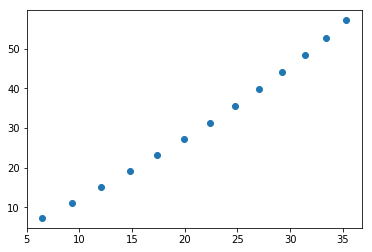

In [12]:
x=df_track['x'].values
y=df_track['y'].values

plt.scatter(x,y)
plt.show()

In [13]:
x,y

(array([  6.47971567,   9.33226767,  12.10679695,  14.80219214,
         17.41737355,  19.95129352,  22.40293687,  24.77132133,
         27.0554979 ,  29.25455125,  31.36760008,  33.39379747,  35.33233121]),
 array([  7.30158542,  11.17584419,  15.10641465,  19.09172575,
         23.1301845 ,  27.2201766 ,  31.36006713,  35.54820117,
         39.78290448,  44.06248415,  48.38522927,  52.74941166,  57.15328652]))

In [14]:
def rotateToQuadrant(x,y):
    seedx=x[1]-x[0]
    seedy=y[1]-y[0]
    phi0=np.arctan2(y[0],x[0])
    phi1=np.arctan2(seedy,seedx)
    phi=phi1
    c, s = np.cos(-phi), np.sin(-phi)
    xr=c*x-s*y
    yr=s*x+c*y
    print phi
    return xr,yr

def func(x, r, vx, vy):
    return r - np.sqrt(r**2-(x-vx)**2) + vy

0.936131862674


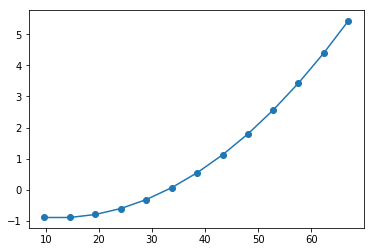

In [15]:
xr,yr=rotateToQuadrant(x,y)
plt.scatter(xr,yr)
plt.plot(xr,yr)
plt.show()

In [16]:
popt, pcov = curve_fit(func, xr, yr, p0=[200.,0.,0.], bounds=([5.,-25.,-25.], [1000., 25, 25]))

In [17]:
popt

array([ 240.57366039,   12.12665349,   -0.90079403])

In [18]:
x,y

(array([  6.47971567,   9.33226767,  12.10679695,  14.80219214,
         17.41737355,  19.95129352,  22.40293687,  24.77132133,
         27.0554979 ,  29.25455125,  31.36760008,  33.39379747,  35.33233121]),
 array([  7.30158542,  11.17584419,  15.10641465,  19.09172575,
         23.1301845 ,  27.2201766 ,  31.36006713,  35.54820117,
         39.78290448,  44.06248415,  48.38522927,  52.74941166,  57.15328652]))

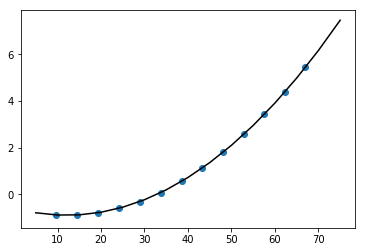

In [21]:
xp=np.arange(5.,80.,5.)
plt.plot(xp,func(xp,popt[0],popt[1],popt[2]),'k')
plt.scatter(xr,yr)
plt.show()

In [20]:
popt

array([ 240.57366039,   12.12665349,   -0.90079403])